In [280]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torchvision

import matplotlib.pyplot as plt
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
import sys
sys.path.append('..')

from config import Config
from vision_model import VisionEncoder, VisionTransformerBlock, VisionTransformer

device = torch.device("mps")

In [282]:
img = torch.rand(size=(2, Config.img_size, Config.img_size, 3), device=device)
img.size()

torch.Size([2, 448, 448, 3])

In [283]:
config = Config()
vis_encoder = VisionEncoder(config=config)
vis_encoder = vis_encoder.to(device)
img_encod = vis_encoder(img)
img_encod.size()

torch.Size([2, 196, 10])

In [284]:
block = VisionTransformerBlock(config=config)
block = block.to(device)
ret = block(img_encod)
ret.size()

torch.Size([2, 196, 10])

In [285]:
vision_model = VisionTransformer(config=config)
vision_model = vision_model.to(device)
ret = vision_model(img_encod)
ret.size()

torch.Size([2, 1960])

torch.Size([3, 333, 500])
torch.Size([20, 31, 3, 16, 16])
img_patches: torch.Size([620, 3, 16, 16])


TypeError: Invalid shape (3, 560, 362) for image data

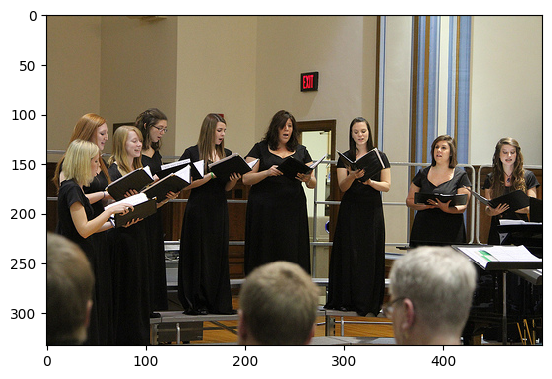

In [287]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    
def get_img_patches(img_tensor: torch.tensor, patch_size = 16)-> torch.tensor:
    # img_tensor: [C x H x W]
    # output: [H//patch_size, w//patch_size, C, patch_size, patch_size]
    img_patches = img_tensor.unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size) # => [C, H//patch_size, w//patch_size, patch_size, patch_size]
    img_patches = torch.permute(img_patches, dims=[1,2,0, 3,4])
    return img_patches

def show_img_patches(img_patches: torch.tensor):
    # img_patches: [ROWS, COLS, C, PATCH_SIZE, PATCH_SIZE]
    ROWS, COLS, C, PATCH_SIZE, _ = img_patches.size()
    grid = torchvision.utils.make_grid(img_patches.reshape(-1, 3, 16, 16), nrow=31, padding=2)
    img_patches = img_patches.reshape(-1, C, PATCH_SIZE, PATCH_SIZE)
    print(f"img_patches: {img_patches.size()}")
    grid_img = torchvision.utils.make_grid(img_patches, nrow=ROWS)
    plt.imshow(grid_img)

img_path = "../../../dataset/flickr30k_images/flickr30k_images/6337872636.jpg"
img_tensor = torchvision.io.read_image(img_path)
print(img_tensor.size())
show(img_tensor)

img_patches = get_img_patches(img_tensor=img_tensor)
print(img_patches.size())
show_img_patches(img_patches)

torch.Size([20, 31, 3, 16, 16])


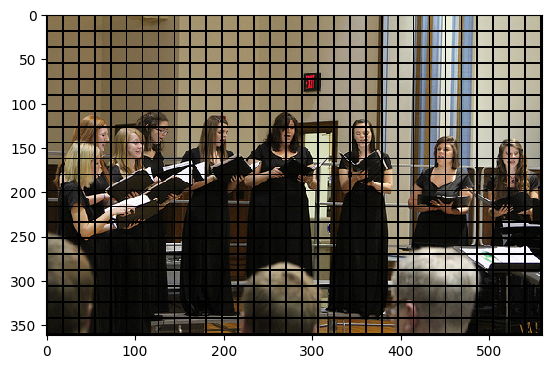

In [289]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

print(img_patches.size())
grid = torchvision.utils.make_grid(img_patches.reshape(-1, 3, 16, 16), nrow=31, padding=2)
show(grid)